In [5]:
#! python3

import matplotlib 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import rc

rc('font', **{'family': 'sans-serif', 'sans-serif': 'cm'})
rc('text', **{'usetex': True,
              'latex.preamble': r'\renewcommand{\familydefault}{\sfdefault}'
              r' \usepackage{sansmath} \sansmath'})
rc('figure', **{'dpi': 200})

In [6]:
results = pd.read_json('workspace/uci-dgp/uci-dgp.json')
results["name"] = results["model"] + ' ' + results["n_layers"].map(str)
results["Test MNLL"] = results['test_mnll']
order = results.name.unique().tolist()
order.sort(key=lambda x:int(x.split()[-1]))
order.sort(key=lambda x:(x.split()[0]))


# Table
table = pd.pivot_table(results,
                       index=['name'],
                       aggfunc=lambda x: r"""%.2f (%.2f)""" % (x.mean(), np.std(x)),
                       columns=['dataset', ], values=['Test MNLL', ], )
table

Test MNLL                                          \
dataset               boston     concrete       energy        kin8nm   
name                                                                   
bsgp - normal 1  2.47 (0.16)  3.12 (0.04)  0.97 (0.13)  -1.12 (0.01)   
bsgp - normal 2  2.47 (0.15)  3.04 (0.05)  0.95 (0.16)  -1.40 (0.01)   
bsgp - normal 3  2.47 (0.14)  2.96 (0.10)  0.95 (0.15)  -1.41 (0.01)   
bsgp - normal 4  2.48 (0.14)  2.97 (0.06)  0.92 (0.14)  -1.43 (0.02)   
bsgp - normal 5  2.48 (0.12)  2.91 (0.08)  0.75 (0.30)  -1.43 (0.01)   
ipvi gp 1        2.84 (0.36)  3.19 (0.11)  1.27 (0.07)  -1.12 (0.02)   
ipvi gp 2        2.73 (0.35)  3.13 (0.11)  1.31 (0.28)  -1.34 (0.02)   
ipvi gp 3        2.61 (0.25)  3.08 (0.13)  1.21 (0.12)  -1.33 (0.03)   
ipvi gp 4        2.64 (0.44)  3.11 (0.18)  1.19 (0.25)  -1.33 (0.01)   
ipvi gp 5        2.51 (0.20)  3.08 (0.17)  1.15 (0.22)  -1.29 (0.02)   
sghmc gp 1       2.82 (0.33)  3.13 (0.09)  1.08 (0.28)  -1.08 (0.01)   
sghmc gp 2       2.77 (0.37)  2.99 (0.07)  0.91 (0.15)  -1.32 (0.01)   
sghmc gp 3       2.78 (0.28)  3.02 (0.16)  0.91 (0.14)  -1.37 (0.02)   
sghmc gp 4       2.75 (0.34)  2.98 (0.13)  0.69 (0.22)  -1.38 (0.02)   
sghmc gp 5       3.75 (1.91)  3.11 (0.21)  1.00 (0.42)  -1.39 (0.02)   
svgp 1           2.53 (0.25)  3.18 (0.05)  1.75 (0.06)  -1.01 (0.01)   

                                                                       
dataset                 naval   powerplant      protein         yacht  
name                                                                   
bsgp - normal 1  -8.22 (0.04)  2.71 (0.02)  2.78 (0.01)  -0.23 (0.13)  
bsgp - normal 2  -8.23 (0.04)  2.67 (0.02)  2.63 (0.02)  -0.72 (0.15)  
bsgp - normal 3  -8.02 (0.04)  2.66 (0.03)  2.57 (0.03)  -0.83 (0.10)  
bsgp - normal 4  -8.03 (0.05)  2.65 (0.05)  2.50 (0.03)  -0.76 (0.13)  
bsgp - normal 5  -8.09 (0.05)  2.65 (0.03)  2.43 (0.03)  -0.74 (0.08)  
ipvi gp 1        -5.96 (0.89)  2.79 (0.03)  2.81 (0.02)   1.21 (1.50)  
ipvi gp 2        -4.98 (0.48)  2.76 (0.07)  2.65 (0.02)   0.74 (1.13)  
ipvi gp 3        -4.86 (0.23)  2.72 (0.06)  2.74 (0.05)   1.05 (1.77)  
ipvi gp 4        -4.94 (0.20)  2.76 (0.02)  2.79 (0.01)   2.47 (2.34)  
ipvi gp 5        -5.09 (0.49)  2.72 (0.04)  2.80 (0.01)   2.84 (3.64)  
sghmc gp 1       -6.23 (0.14)  2.76 (0.05)  2.81 (0.01)  -0.11 (0.28)  
sghmc gp 2       -6.57 (0.11)  2.72 (0.04)  2.71 (0.02)  -0.52 (0.14)  
sghmc gp 3       -6.56 (0.09)  2.68 (0.02)  2.66 (0.03)  -0.57 (0.19)  
sghmc gp 4       -6.42 (0.08)  2.67 (0.04)  2.62 (0.02)  -0.69 (0.12)  
sghmc gp 5       -6.55 (0.09)  2.65 (0.04)  2.59 (0.02)  -0.53 (0.18)  
svgp 1           -6.67 (0.09)  2.79 (0.02)  2.92 (0.01)   0.78 (0.13)

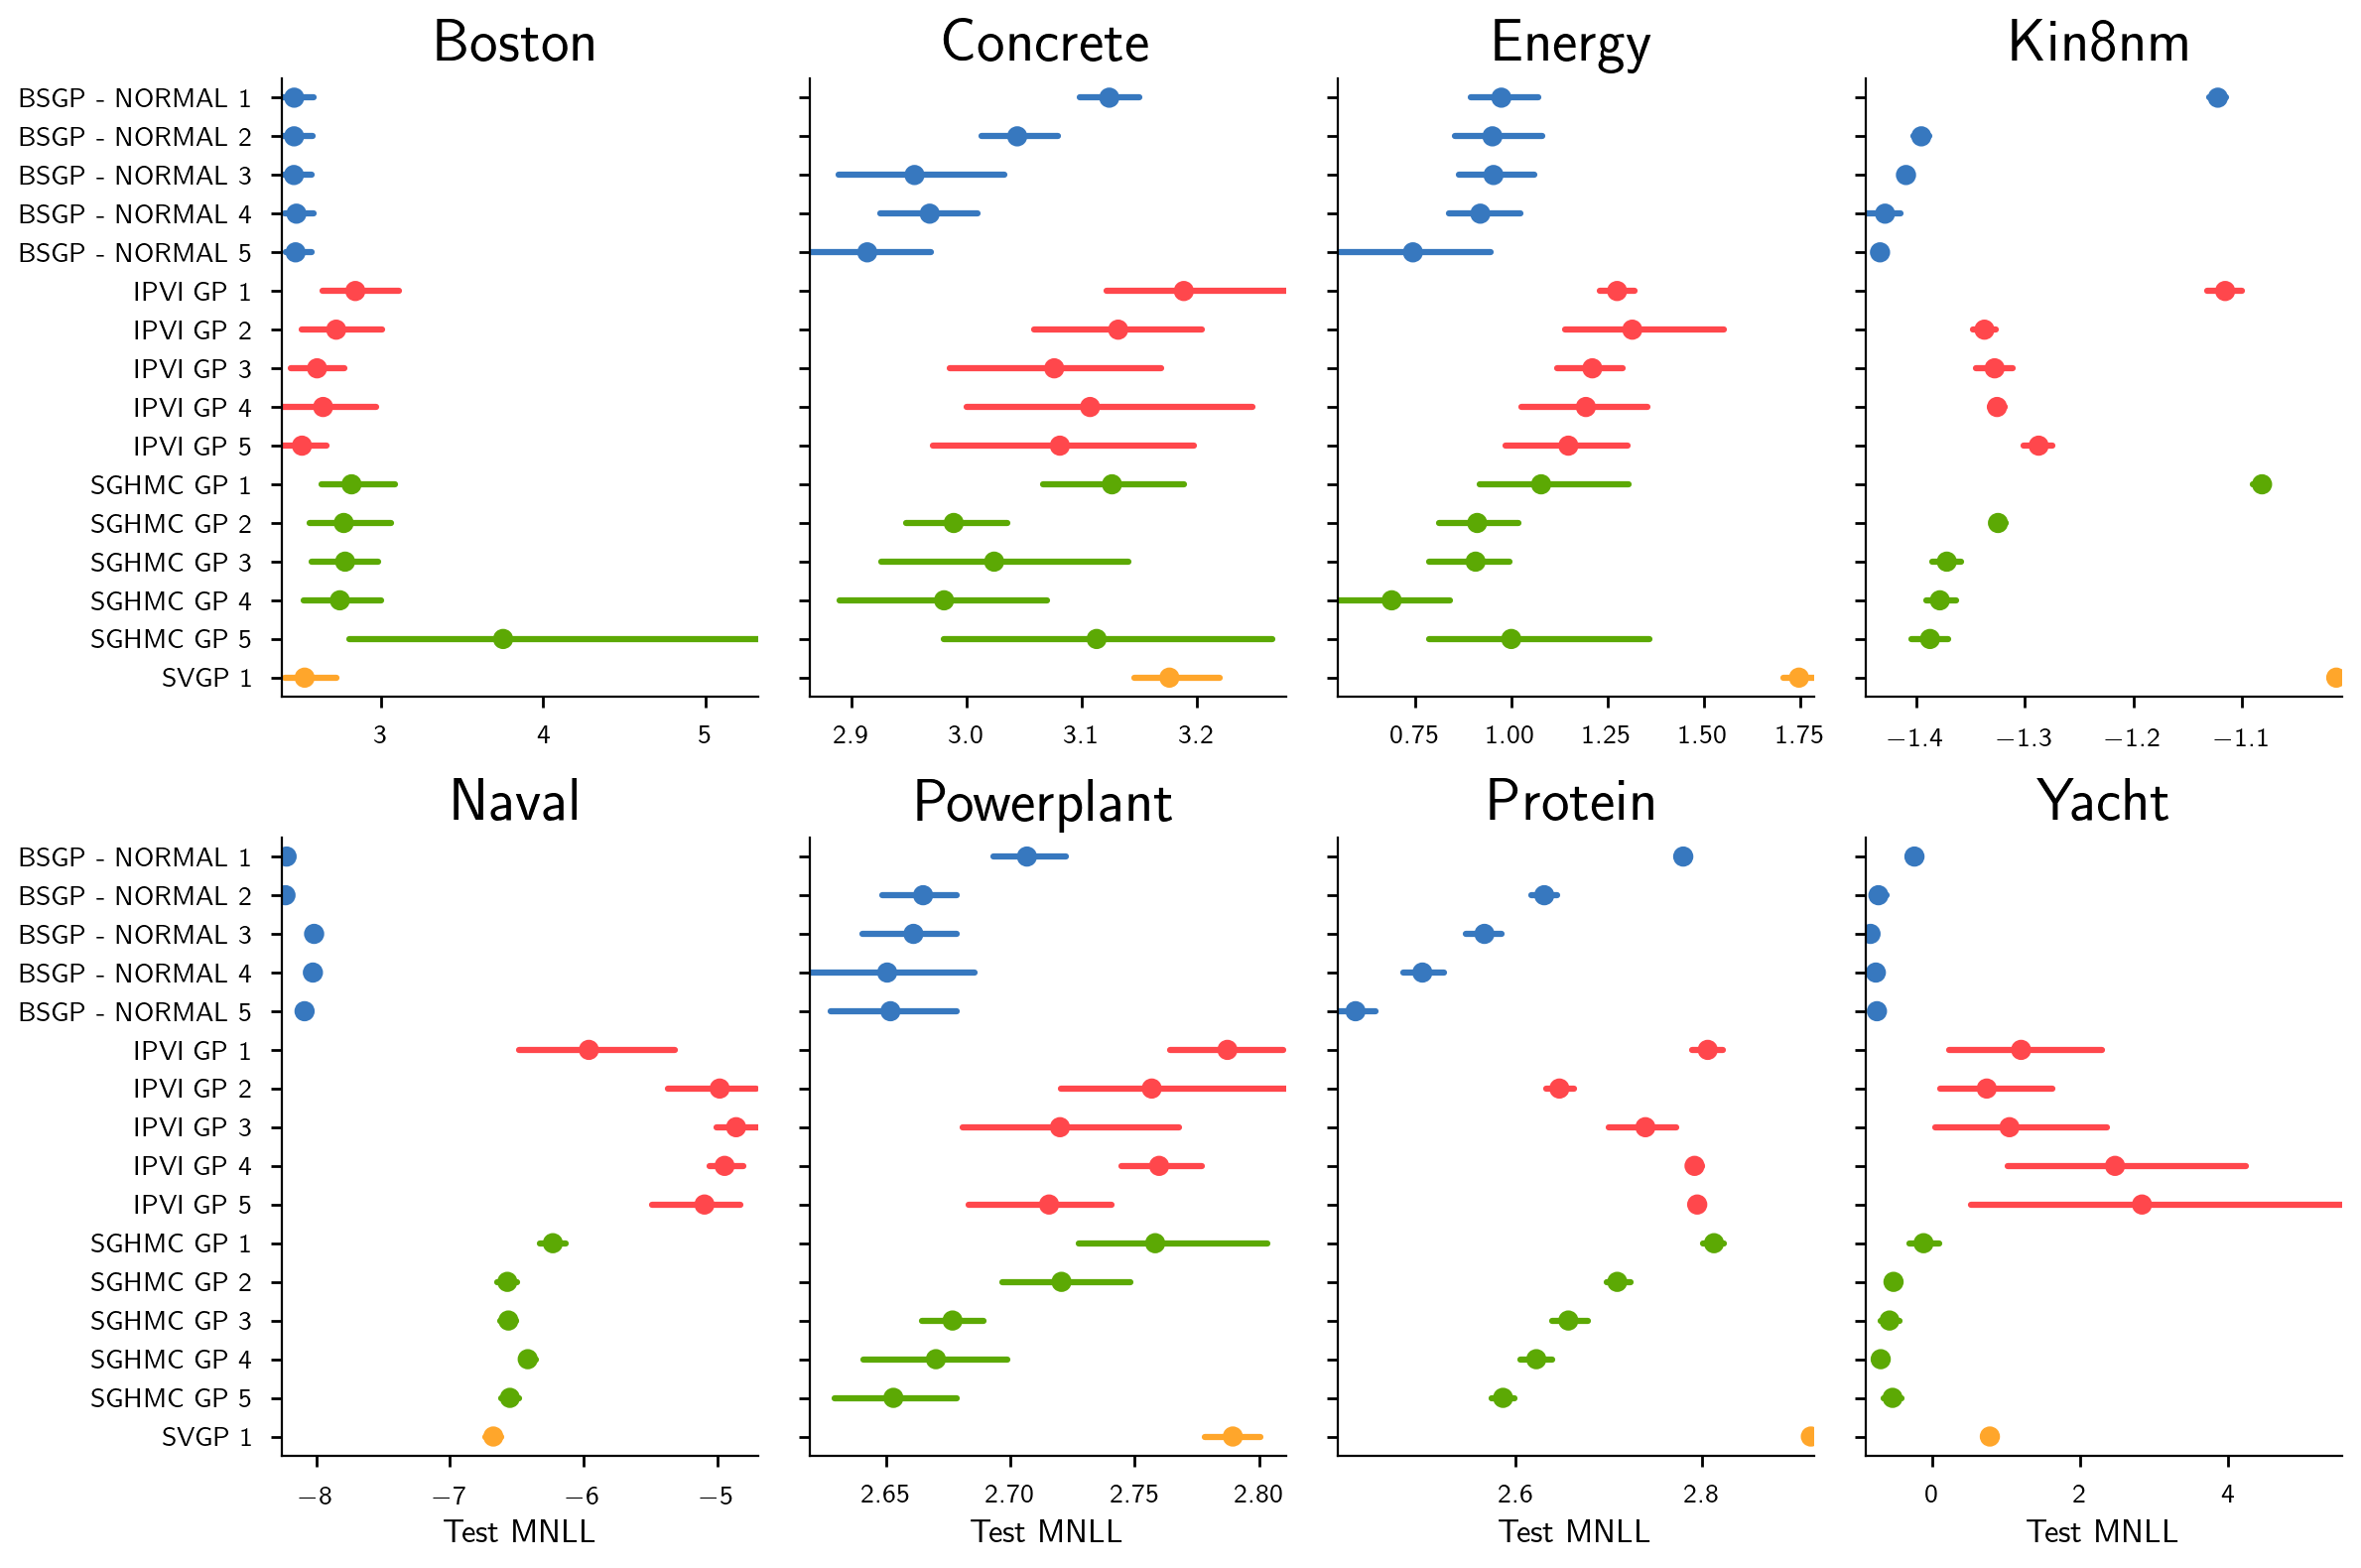

In [7]:
# Plot 
col_order = results.dataset.unique().tolist()
col_order.sort()

colors = ["windows blue"]*5 + ["light red"]*5 + ['leaf green']*5 + ["mango"]
cp = sns.xkcd_palette(colors)

g = sns.catplot(x="Test MNLL", y="name", kind='point', order=order, col_order=col_order, col_wrap=4, showfliers=False, join=False, 
                palette=cp,height=4,aspect=0.75, col="dataset", data=results, sharex=False);
axs = g.axes

for ax in axs:
    ax.set_title(ax.get_title().replace('dataset = ', '').capitalize())
    ax.set_ylabel('')
    
axs[0].set_yticklabels([l._text.upper() for l in axs[0].get_yticklabels()])

plt.show()

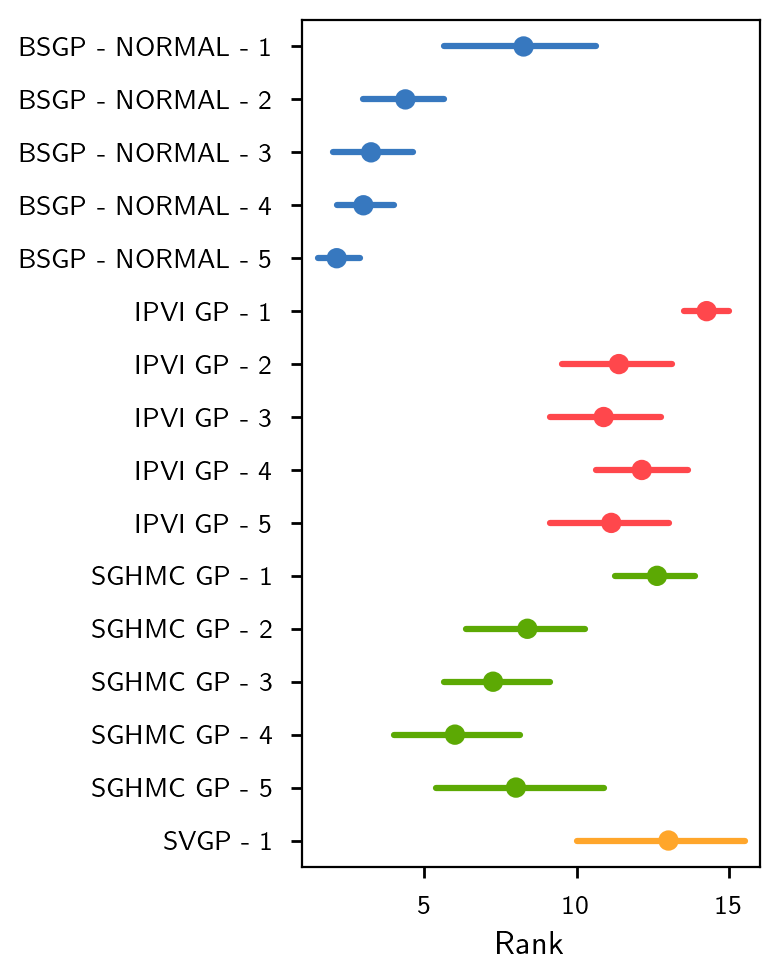

In [8]:
df = results.copy()
df['name'] = df['model'] + ' - ' + df['n_layers'].map(str)
df = df.groupby(['dataset', 'name', ])['test_mnll'].mean().reset_index()
df['Rank'] = df.groupby(['dataset', ])['test_mnll'].rank()
order = df.name.unique().tolist()
order.sort(key=lambda x:int(x.split()[-1]))
order.sort(key=lambda x:(x.split()[0]))
    
fig, ax = plt.subplots(figsize=[4,5])
sns.pointplot(x="Rank", y="name", order=order, palette=cp, 
                   data=df, ax=ax );
ax.set_xlim(1, 16);
ax.set_yticklabels([l._text.upper() for l in ax.get_yticklabels()])
ax.set_ylabel('')
plt.show()